<a href="https://colab.research.google.com/github/Eugeneantientropy/ML100Days/blob/main/HW_Day_90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


請參考範例程式碼 Day090_color_histogram.ipynb，完成以下作業：

畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？

In [1]:
import os
import numpy as np
import keras
os.environ["CUDA_VISIBLE_DEVICES"] = "" # 使用 CPU

import cv2 # 載入 cv2 套件
import matplotlib.pyplot as plt

train, test = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


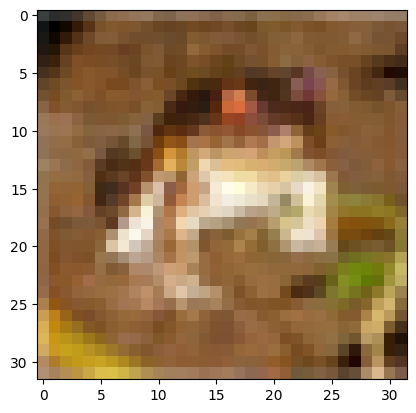

In [2]:
image = train[0][0]

plt.imshow(image)
plt.show()


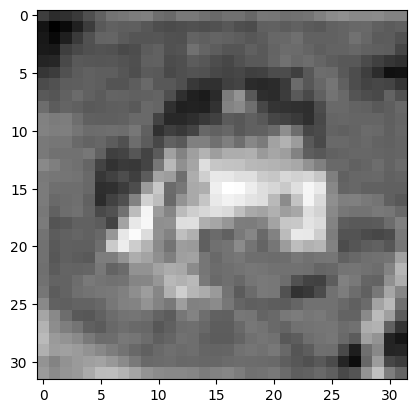

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')
plt.show()

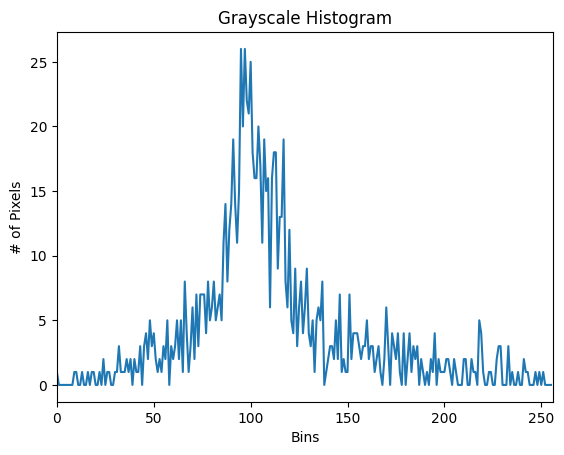

In [7]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [8]:
print("hist shape:", hist.shape, "\n直方圖中前兩個值:", hist[:2]) # 1 表示該灰度圖中，只有 1 個 pixel 的值是 0，0 個 pixel 的值是 1


hist shape: (256, 1) 
直方圖中前兩個值: [[1.]
 [0.]]


In [9]:
print(np.sum(hist[15:32]))


10.0


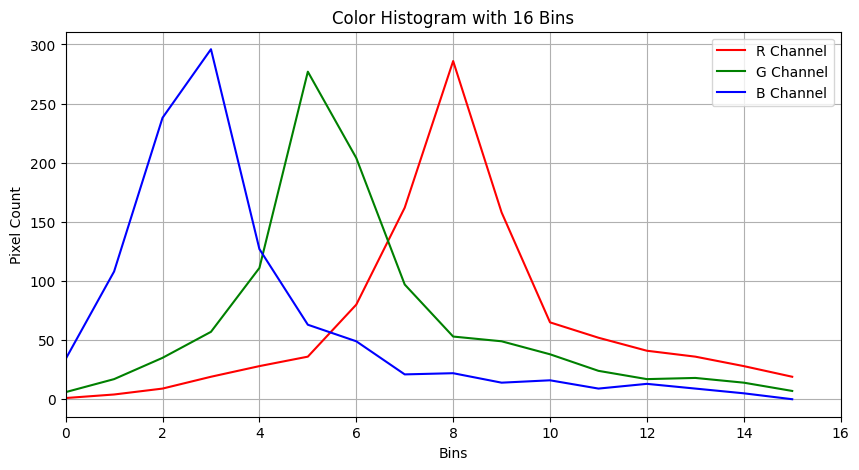

{'R': 4, 'G': 17, 'B': 108}

In [12]:
# 分離 R、G、B 三個通道
chans = cv2.split(image)
colors = ("r", "g", "b")  # 設定顏色順序

# 設定 bin 數量
num_bins = 16
bin_range = [0, 256]  # 設定顏色範圍
bin_width = (bin_range[1] - bin_range[0]) // num_bins  # 計算每個 bin 的寬度

# 計算 [16, 32] 對應的 bin 索引
bin_start, bin_end = 16, 32
bin_index = bin_start // bin_width

# 建立畫布
plt.figure(figsize=(10, 5))
plt.title("Color Histogram with 16 Bins")
plt.xlabel("Bins")
plt.ylabel("Pixel Count")

# 計算並繪製直方圖
pixel_counts = {}  # 用來儲存 [16, 32] bin 內的像素數量
for (chan, color) in zip(chans, colors):
    # 計算直方圖
    hist = cv2.calcHist([chan], [0], None, [num_bins], bin_range)

    # 畫出該 channel 的直方圖
    plt.plot(hist, color=color, label=f"{color.upper()} Channel")

    # 計算 [16, 32] 這個 bin 內的像素數量
    pixel_count = hist[bin_index][0]
    pixel_counts[color.upper()] = int(pixel_count)

plt.xlim([0, num_bins])
plt.legend()
plt.grid()
plt.show()

# 顯示每個 channel 在 [16, 32] 這個 bin 內的像素數量
pixel_counts